# Sales Analysis

# Import Necessary Libraries / Importar librerias necesarias

In [1]:
import pandas as pd

#### Merging 12 months of sales data into a single file / Juntamos todos los datos en solo 1 archivo.

In [29]:
import os

# Determinamos la ruta donde esta la carpeta que contiene nuestros archivos CSV

folder_path = r'C:\Users\lauta\OneDrive\Escritorio\Raw data Portfolio\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'

# Agrupamos en una lista los archivos CSV en la carpeta
csv_files = [os.path.join(folder_path,file) for file in os.listdir(folder_path)if file.endswith('.csv')]

# Creamos una lista vacia para almacenar los DataFrames
dataframes = []

# Leemos cada archivo CSV y lo añadimos a la lista de Dataframes 
for csv_file in csv_files:
    dataframes.append(pd.read_csv(csv_file))
    
# Juntamos (concatenamos) todos los Dataframes en uno solo (Utilice el parametro ignore_index =True para que el dataframe
# resultante tenga un indice unico, sino concatenaria incluso los indices de todos los dataframes.)
merged_df = pd.concat(dataframes, ignore_index=True)

merged_df = merged_df.dropna().reset_index(drop=True)

In [191]:
merged_df.to_csv(r'C:\Users\lauta\OneDrive\Escritorio\Raw data Portfolio\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\merged_df.csv', index=False)

## Read in updated dataframe / Lectura en un dataframe actualizado

In [30]:
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Augment data with additional columns / Aumentaremos los datos con columnas adicionales

### Delete NaN data from our DF / Eliminamos los datos NaN de nuestro Dataframe

In [35]:
merged_df = merged_df.loc[merged_df['Order ID'] != 'Order ID']

merged_df = merged_df.reset_index(drop=True)
merged_df.head(520)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
515,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
516,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
517,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301"
518,177056,Flatscreen TV,1,300,04/20/19 23:52,"180 9th St, San Francisco, CA 94016"


### T2: Add month column

In [37]:
# Convertir la columna 'Order Date' al tipo de dato datetime
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])

# Extraer el mes de cada fecha y crear una nueva columna 'Month'
merged_df['Month'] = merged_df['Order Date'].dt.month

merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### T3 : Add total order Column / Creo una columna con el total vendido en dicha orden

In [47]:
merged_df['Total Order'] = merged_df['Quantity Ordered'].astype("int") * merged_df['Price Each'].astype("float")
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Q1 : What was the best month for sale? How much was earned that month?
### Q1 : Cual fue el mejor mes en ventas? Cuanto fue la ganancia dicho mes?

In [49]:
# Agrupar por mes y sumar los ingresos de cada mes
monthly_revenue = merged_df.groupby('Month')['Total Order'].sum()

#Los ordeno del mes que mas ganancias tuvo hasta el que menos.
#monthly_revenue = monthly_revenue.sort_values(ascending=False)
# Mostrar los ingresos mensuales
print(monthly_revenue)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Order, dtype: float64


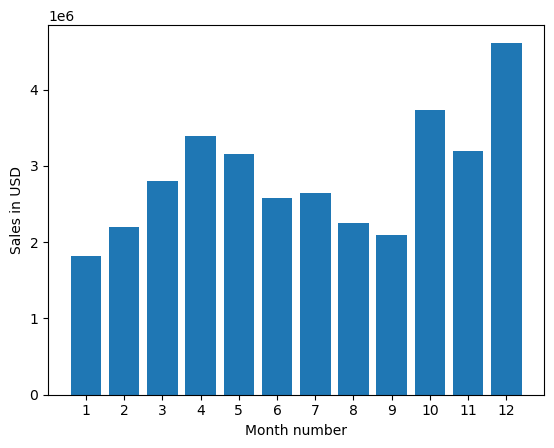

In [53]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, monthly_revenue)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

## Q2: What city had the highest number of sales? / En que ciudad se realizan mas ventas?

#### T4 : Add city name column / Agreguemos una columna con las ciudades

In [79]:
merged_df['City'] = merged_df['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")

#merged_df.drop(columns='State', inplace = True)
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### T5 : Group by city and sum Total order / Agrupamos por nombre de ciudad y sumamos totales de compras

In [80]:
sales_by_city = merged_df.groupby('City').sum(numeric_only=True)['Total Order'].reset_index()
sales_by_city

,City,Total Order
0,Atlanta (GA),2795498.58
1,Austin (TX),1819581.75
2,Boston (MA),3661642.01
3,Dallas (TX),2767975.40
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
6,Portland (ME),449758.27
7,Portland (OR),1870732.34
8,San Francisco (CA),8262203.91
9,Seattle (WA),2747755.48


## T6 : Let's show it / Grafiquemos

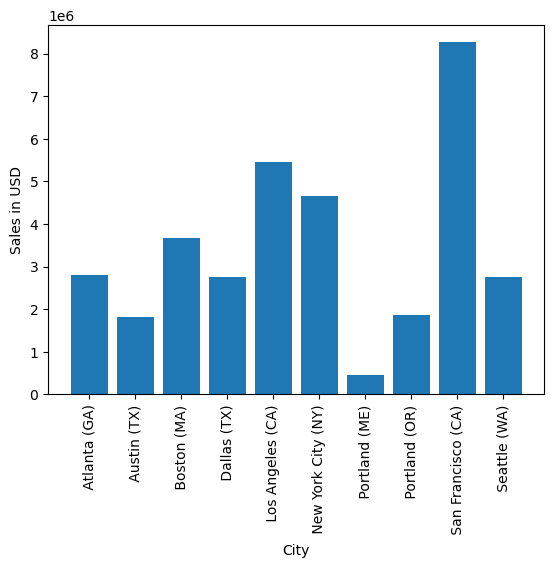

In [83]:
city = sales_by_city['City']

plt.bar(city, sales_by_city['Total Order'])

plt.xticks(city, rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

### Q3 : What time should we display advertisements to maximize likelihood of customer's buying product?
### Q3 : A que hora deberiamos mostrar publicidad para maximizar las compras ?

### T7: Add Order Hour column / Agregamos la columna Order Hour para saber a que hora se realizo la venta

In [91]:
merged_df['Order Hour'] = pd.to_datetime(merged_df['Order Date']).dt.hour


merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


#### T8:Group by Time and Sum Total order / Agrupamos por Time, y sumamos total order para saber ventas por hora

In [92]:
sales_by_hour = merged_df.groupby('Order Hour')['Total Order'].sum().reset_index()
sales_by_hour

,Order Hour,Total Order
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


### T9 : Plot our results / Graficamos nuestros resultados

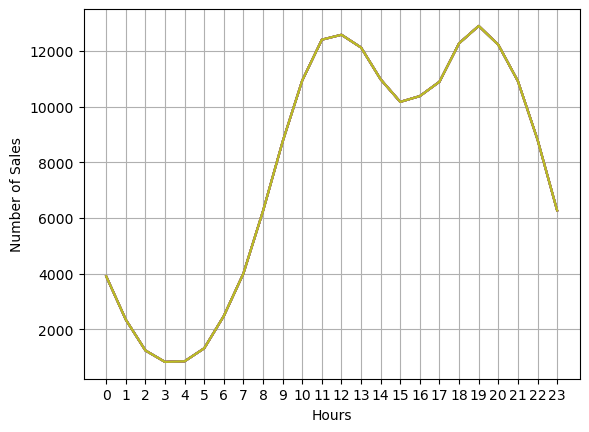

In [101]:
import matplotlib.pyplot as plt

plt.plot(sales_by_hour['Order Hour'], merged_df.groupby(['Order Hour']).count())
plt.xticks(sales_by_hour['Order Hour'])
plt.xlabel('Hours')
plt.ylabel('Number of Sales')
plt.grid()
plt.show()

#Como vemos, y para responder a nuestra pregunta, los mejores momentos para mostrar publicidad, son entre las 10 y 12
# Y entre las 18 y las 20 hs


### Q4 : What products are most often sold together? / Que productos usualmente se venden juntos?

In [103]:
merged_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),10
8,176565,Macbook Pro Laptop,1,1700,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),14


In [147]:
from itertools import combinations
from collections import Counter

# Agrupar los datos por Order ID
grouped = merged_df.groupby('Order ID')

# Crear una lista de los productos vendidos en cada orden
product_lists = grouped['Product'].apply(list)

# Obtener todas las combinaciones posibles de productos en cada orden
product_combinations = product_lists.apply(lambda x: list(combinations(x, 2)))

# Contar la frecuencia de cada combinación de productos
product_counts = Counter([combo for sublist in product_combinations for combo in sublist])

# Obtener las combinaciones de productos más frecuentes en cada orden, ordenadas de mayor a menor frecuencia
def most_common_products(order_id):
    combinations = product_combinations.loc[order_id]
    if len(combinations) == 0:
        return ''
    else:
        counts = [product_counts[combo] for combo in combinations]
        max_count = max(counts)
        most_common = [combo for i, combo in enumerate(combinations) if counts[i] == max_count]
        return ', '.join([f'{p[0]} and {p[1]}' for p in most_common])

merged_df['Most Common Products'] = merged_df['Order ID'].apply(most_common_products)

merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Order,City,Order Hour,Most Common Products
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,Google Phone and Wired Headphones
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,Google Phone and Wired Headphones
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,


In [148]:
count = Counter()

for row in merged_df['Most Common Products']:
    row_list = row.split('and')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone ', ' Lightning Charging Cable') 2131
('Google Phone ', ' USB-C Charging Cable') 2109
('iPhone ', ' Wired Headphones') 791
('Vareebadd Phone ', ' USB-C Charging Cable') 773
('Google Phone ', ' Wired Headphones') 675
('iPhone ', ' Apple Airpods Headphones') 584
('Google Phone ', ' Bose SoundSport Headphones') 331
('Vareebadd Phone ', ' Wired Headphones') 226
('Vareebadd Phone ', ' Bose SoundSport Headphones') 123
('Lightning Charging Cable ', ' USB-C Charging Cable') 110


### Q5: What product sold the most ? Why do you think it sold the most? / Cual fue el producto mas vendido y
### por que crees que lo fue?

### T10 : Compare al products and plot them / Compara todos los productos y graficalos

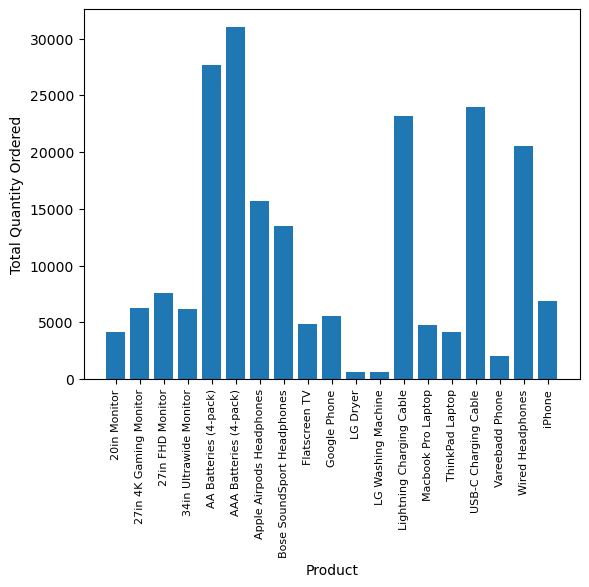

In [170]:
# Quantity Ordered esta en STR, lo cambiamos a Int
merged_df['Quantity Ordered'] = merged_df['Quantity Ordered'].astype(int)

product_group = merged_df.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered'].reset_index()

product = quantity_ordered['Product']
quantity = quantity_ordered['Quantity Ordered']

plt.bar(product,quantity)

plt.xticks(product, rotation='vertical', size=8)
plt.ylabel('Total Quantity Ordered')
plt.xlabel('Product')
plt.show()

### Overlay a second Y-axis on existing chart / Superponer un segundo eje Y en el gráfico existente


C:\Users\lauta\AppData\Local\Temp\ipykernel_11228\2918442385.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=8)


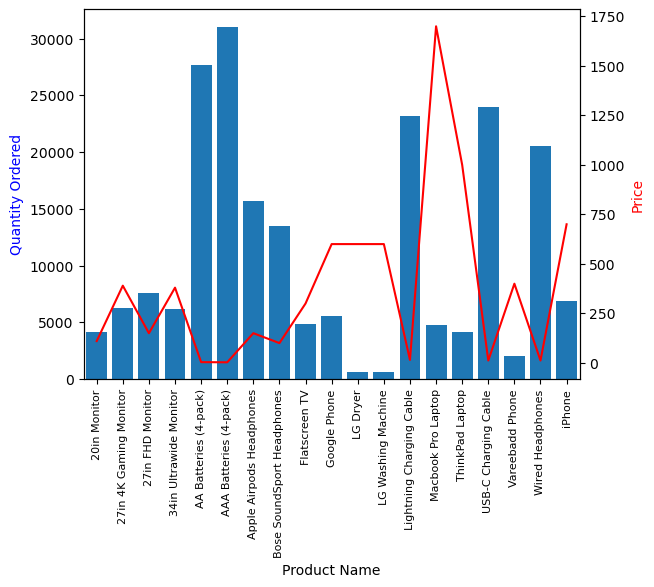

In [189]:
# Queremos probar que la cantidad de ventas esta directamente relacionado con el precio, ya que las baterias AAA son mas
# Vendidas por ser mucho mas baratas que un Google Phone por ejemplo.
merged_df['Price Each'] = merged_df['Price Each'].astype(float)
prices = merged_df.groupby('Product').mean(numeric_only = True)['Price Each'].reset_index()


# trazar la primera serie de datos
fig, ax1 = plt.subplots()

# crear un segundo eje Y y trazar la segunda serie de datos

ax2 = ax1.twinx()

ax1.bar(product, quantity)

ax2.plot(prices['Product'],prices['Price Each'], color='r')

ax1.set_xlim(-0.5, len(product)-0.5)
ax1.set_xticklabels(product, rotation='vertical', size=8)

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'b')
ax2.set_ylabel('Price', color = 'r')

plt.show()
